In [7]:
import pandas 
import numpy
import tensorflow
import matplotlib.pyplot as plt

In [5]:
data_train=pandas.read_csv("./Datasets/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")
data_test=pandas.read_csv("./Datasets/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv")

In [6]:
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
train=numpy.array(data_train["Open"].values)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
train_scale=scale.fit_transform(train.reshape(-1, 1))

In [31]:
x_train=[]
y_train=[]

In [32]:
datos=60

In [33]:
for i in range(datos, 1258):
    x_train.append(train_scale[i-datos:i, 0])
    y_train.append(train_scale[i, 0])

In [34]:
x_train, y_train = numpy.array(x_train), numpy.array(y_train)

In [35]:
y_train.shape

(1198,)

In [39]:
x_train= numpy.reshape(x_train, (-1, datos, 1))
input_shape=(datos, 1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [177]:
regressor=Sequential()

In [178]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=input_shape )) #return_sequencees True cuando se va a usar otra capa
regressor.add(Dropout(0.2))

In [179]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [180]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [181]:
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [182]:
regressor.add(Dense(units=10, activation="relu"))
regressor.add(Dense(units=1))

In [183]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [184]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [259]:
regressor.fit(x_train, y_train, batch_size=2, epochs=20, verbose=1, validation_data=(x_test, inputs[60:]))

Epoch 1/20
599/599 [==============================] - 40s 56ms/step - loss: 0.0022 - val_loss: 0.0057
Epoch 2/20
599/599 [==============================] - 33s 56ms/step - loss: 0.0012 - val_loss: 5.8788e-04
Epoch 3/20
599/599 [==============================] - 34s 56ms/step - loss: 9.9515e-04 - val_loss: 0.0028
Epoch 4/20
599/599 [==============================] - 34s 56ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 5/20
599/599 [==============================] - 33s 56ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 6/20
599/599 [==============================] - 33s 56ms/step - loss: 0.0011 - val_loss: 3.8816e-04
Epoch 7/20
599/599 [==============================] - 34s 56ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 8/20
599/599 [==============================] - 34s 56ms/step - loss: 9.3330e-04 - val_loss: 0.0046
Epoch 9/20
599/599 [==============================] - 34s 56ms/step - loss: 9.6870e-04 - val_loss: 0.0057
Epoch 10/20
599/599 [==============================] - 34s 57m

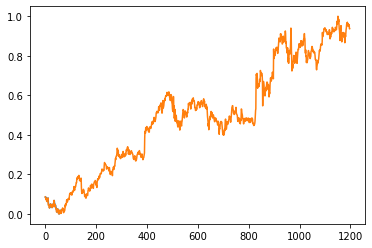

In [260]:
plt.plot(x_train[59])
plt.plot(y_train)

In [261]:
real_stock_price=data_test["Open"].values

In [262]:
dataset_total=pandas.concat((data_train["Open"], data_test["Open"]), axis=0)

In [263]:
dataset_total.shape

(1278,)

In [264]:
inputs=dataset_total[len(dataset_total)-len(data_test)-datos:].values

In [265]:
inputs=inputs.reshape(-1,1)

In [266]:
inputs=scale.transform(inputs)

In [267]:
datos_test=60

In [268]:
x_test=[]
for i in range(datos, 80):
    x_test.append(inputs[i-datos:i, 0])

In [269]:
x_test=numpy.array(x_test)
x_test=x_test.reshape(-1, datos_test, 1)

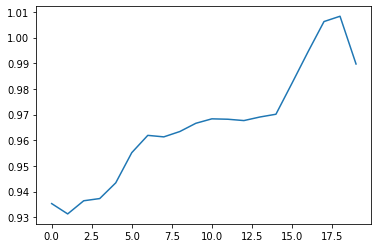

In [270]:
pred=regressor.predict(x_test)
plt.plot(pred)

In [271]:
pred=scale.inverse_transform(pred, verbose=1)

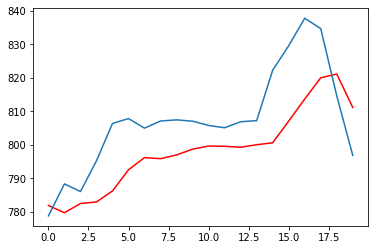

In [272]:
plt.plot(pred, color="red")
plt.plot(real_stock_price)